This is a CV2 learning notebook. Can be used as reference for writing CV2 scripts later

In [1]:
import cv2
import numpy as np

In [2]:
#img = cv2.imread(r'C:\Users\Astha\Dropbox\data science\computer vision\image\grassland-1.png')
img = cv2.imread(r'image\grassland-1.png')
img.shape

(300L, 400L, 3L)

#### Display an image

cv2.imshow is always used with the next 2 functions, otherwise the window will appear only for ~1 ms. Press any key after the image displays to get rid of it. If you don't close it, apparently things don't seem to run properly. 

In [3]:
cv2.imshow('grassland', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Cropping image = slicing numpy array

In [4]:
cv2.imshow('grassland', img[100:120])
cv2.waitKey(0)
cv2.destroyAllWindows()

### BGR

#### The last index stores the 3 rgb channels in the order B,G,R! Mind the order.

In [5]:
cv2.imshow('grassland', img[:,:,0])
cv2.waitKey(0)
cv2.destroyAllWindows()

#### This is how you write an image

In [6]:
cv2.imwrite('image\grassland_R.png', img[:,:,0])
cv2.imwrite('image\grassland_G.png', img[:,:,1])

True

In [7]:
img_R = img[:,:,2]
img_G = img[:,:,1]
#img_2 = cv2.imread(r'C:\Users\Astha\Dropbox\data science\computer vision\image\forest-1.png')
img_2 = cv2.imread(r'image\forest-1.png')

In [8]:
cv2.imshow('forest', img_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Inserted the center 100x100 px square of 1 image into another image

In [9]:
center = np.array(img.shape[:2])/2
center_part = img_R[center[0]-50:center[0]+50:1, center[1]-50:center[1]+50:1]

In [10]:
cv2.imshow('center', center_part)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
center_part.shape

(100L, 100L)

In [12]:
img_2R = img_2[:,:,0]
img_2R[center[0]-50:center[0]+50:1, center[1]-50:center[1]+50:1] = center_part 

In [13]:
cv2.imshow('new', img_2R)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('image\center_added.png', img_2R)

True

#### Image operations example

Image operations example. Subtract mean from image, then divide by std dev and finally multiply by 10. This might d funny things because the array type was UInt 8 and this might result in negative or decimal values. 

In [14]:
int(np.mean(img_G))

147

In [15]:
img_Gnew = (img_G - np.mean(img_G))/np.std(img_G)*10 
#img_Gnew = img_Gnew/np.mean(img_Gnew)
print(img_G.dtype)
print((img_G - int(np.mean(img_G))).dtype)
print((img_G - np.mean(img_G)).dtype)
print(((img_G - np.mean(img_G))/np.std(img_G)).dtype)
print(img_Gnew.dtype)

uint8
uint8
float64
float64
float64


Note that the operation caused the image to convert from uint8 to float64. This will create problems with imshow. If we subtract an integer from the uint8 array, it retained the uint8 type of the array. Lets look at this operation in more detail. Numpy array subtraction is different from cv2 array subtraction

In [16]:
img_G_1 = (img_G - int(np.mean(img_G)))
img_G_2 = cv2.add(img_G,-int(np.mean(img_G)))

In [17]:
cv2.imshow('np addition', img_G_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
cv2.imshow('cv2 add', img_G_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
cv2.imshow('original', img_G)
cv2.waitKey(0)
cv2.destroyAllWindows()

After looking at all 3 outputs, it is clear that we should use cv2 for these operations and not the plain numpy subtraction. Compared to the original, mean subtraction should make the whole thing darker, but the vanilla subtraction makes some places lighter and some darker. 

cv2 will threshold numbers below 0 to 0 and above 255 to 255. Below is an example of what numpy will do. 

In [20]:
x = np.uint8([93])
y = np.uint8([147])
print x-y #93-147 = -54%256 = 202

[202]


In [21]:
img_G_3 = cv2.add(cv2.add(img_G,-(np.mean(img_G)))/np.std(img_G)*100,(np.mean(img_G)))  

In [22]:
img_G_3 = img_G_3/np.amax(img_G_3)

In [23]:
cv2.imshow('cv2 add', img_G_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Adding borders to images

In [24]:
replicate = cv2.copyMakeBorder(img_G, 50,50,50, 50,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img_G,50,50,50, 50,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img_G, 50,50,50, 50,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img_G, 50,50,50, 50,cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img_G, 50,50,50, 50,cv2.BORDER_CONSTANT, value = 125)


#### Display multiple images together

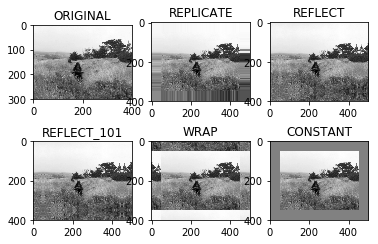

In [25]:
from matplotlib import pyplot as plt
plt.subplot(231),plt.imshow(img_G,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

In [26]:
cv2.useOptimized()

True

#### Hough transform to detect lines

First lets use the built in hough transform in OpenCV to try it out. We will use the image below. 

In [27]:
img = cv2.imread(r"image\ps1-input0-noise.png")

In [28]:
cv2.imshow('image1', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray,15)
blur = cv2.GaussianBlur(gray,(9,9),1)
cv2.imshow('GaussianBlur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('MedianFilter',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
edges = cv2.Canny(median,50,200,apertureSize = 3)
cv2.imshow('Edges',edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
lines = cv2.HoughLines(edges,0.25,np.pi/180,60)
img2 = np.copy(median)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
for rho,theta in lines.squeeze():
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img2,(x1,y1),(x2,y2),(0,0,255),1)
    

cv2.imshow('lines',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
edges_X, edges_Y = np.where(edges == 255)
accu = np.zeros((int(np.sqrt(2*len(edges)**2))+1,180))
accu.shape

(363L, 180L)

In [33]:
for i in range(0,len(edges_X)):
    for theta in range(0,180):
        d = edges_X[i]*np.cos(theta/180.0*np.pi) + edges_Y[i]*np.sin(theta/180.0*np.pi)
        #if i == 1:
            #print(int(np.round(d)))
        accu[int(np.round(d)), theta] += 1
   

In [35]:
cv2.imshow('accu', accu/np.amax(accu)*5)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
edges_X

array([  0,   0,   0, ..., 255, 255, 255], dtype=int64)

In [37]:
edges_Y

array([  8,  13,  27, ..., 133, 184, 187], dtype=int64)

In [38]:
np.arctan2(1,1)*180/np.pi

45.0

# Stereo - depth - disparity

In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [40]:
def find_best_match(patch, strip):
    best_x = 0
    diff = float("inf")
    x_size = int(patch.shape[1])
    for col_start in range(0, strip.shape[1]-x_size+1):
        other_patch = strip[:, col_start:col_start+x_size]
        ssd = np.sum(patch-other_patch)**2
        if ssd<diff:
            diff = ssd
            best_x = col_start
            #print(diff)
    #patch and strip have the same number of rows. 
    return best_x

In [41]:
def disparity_ssd(L, R, patch_size = [8,8]):
    assert L.shape == R.shape, "L and R should have the same size."
    disparity = np.zeros((L.shape[0] - L.shape[0]%patch_size[0], L.shape[0] - L.shape[0]%patch_size[0]))
    #templates are non overlapping
    for nrow in range(0,int(L.shape[0]/patch_size[0])):
        patch_row_start = 0 + nrow*patch_size[0]
        for ncol in range(0,int(L.shape[1]/patch_size[1])):
            patch_col_start = 0 + ncol*patch_size[1]
            patch_loc = [patch_row_start, patch_col_start]
            patch_left = L[patch_loc[0]:patch_loc[0]+patch_size[0],patch_loc[1]:patch_loc[1]+patch_size[1]]
            strip_right = R[patch_loc[0]:patch_loc[0]+patch_size[0],:]
            best_x = find_best_match(patch_left, strip_right)
            disparity[patch_loc[0]:patch_loc[0]+patch_size[0],patch_loc[1]:patch_loc[1]+patch_size[1]] = best_x-patch_col_start
    return disparity
                      

In [42]:
img_L = cv2.imread(r'image\pair1-L.png')
img_R = cv2.imread(r'image\pair1-R.png')
gray_L = cv2.cvtColor(img_L, cv2.COLOR_BGR2GRAY)
gray_R = cv2.cvtColor(img_R, cv2.COLOR_BGR2GRAY)

cv2.imshow('gray_L', gray_L)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('R', gray_R)
cv2.waitKey(0)
cv2.destroyAllWindows()
#gray_L = gray_L.astype(float)
#gray_R = gray_R.astype(float)



In [ ]:
disparity_L = disparity_ssd(gray_L, gray_R, [8,8])

disparity_show = disparity_L - np.amin(disparity_L)
disparity_show = disparity_show/np.amax(disparity_show)
cv2.imshow('disparity', disparity_show)
cv2.waitKey(0)
cv2.destroyAllWindows()


disparity_R = disparity_ssd(gray_R, gray_L, [8,8])

disparity_show = disparity_R - np.amin(disparity_R)
disparity_show = disparity_show/np.amax(disparity_show)
cv2.imshow('disparity', disparity_show)
cv2.waitKey(0)
cv2.destroyAllWindows()